In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from PIL import Image

# Open image file and get the dimensions
img = Image.open('test/Carrot/1001.jpg')
shape = img.size
print(f'Image size: {shape}')
# Define parameters
batch_size = 64
num_classes = 15
epochs = 5
steps = 100
input_shape = (shape[0], shape[1], 3)

# Paths to image directories
TRAIN_DIR = 'train'
TEST_DIR = 'test'
VALIDATION_DIR = 'validation'

Image size: (224, 224)


In [3]:
# Data generator with no data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Data generator with data augmentation
train_datagen_aug = ImageDataGenerator(rescale=1./255, # Rescale pixel values to [0, 1]
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True) 

train_generator_aug = train_datagen_aug.flow_from_directory(
    TRAIN_DIR, target_size=shape, batch_size=batch_size, class_mode='categorical')

# Load data with data generators
test_generator = test_datagen.flow_from_directory(
    TEST_DIR, target_size=shape, batch_size=batch_size, class_mode='categorical')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR, target_size=shape, batch_size=batch_size, class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR, target_size=shape, batch_size=batch_size, class_mode='categorical')

# Shape of data
print(f'Data shape: {train_generator[0][0].shape}')

# Number of classes
print(f'Number of classes: {len(train_generator.class_indices)}')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


KeyboardInterrupt: 

In [ ]:
#Shallow model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

print("Model parameters = %d" % model.count_params())
print(model.summary())

history = model.fit(train_generator, epochs=8, validation_data=validation_generator, validation_steps=steps)

score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model parameters = 99144655
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_38 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 110, 110, 64)     0         
 g2D)                                                            
                                                                 
 dropout_38 (Dropout)        (None, 110, 110, 64)      0         
                                                                 
 flatten_18 (Flatten)        (None, 774400)            0         
                                                                 
 dense_38 (Dense)            (None, 128)               99123328  
                         

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Shallow model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Shallow model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze pre-trained layers (with them epoch takes 4 hours)
for layer in base_model.layers:
    layer.trainable = False
    
model = Sequential()
model.add(base_model)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

print("Model parameters = %d" % model.count_params())
print(model.summary())

# Train the model with no data augmentation
history = model.fit(train_generator, epochs=2, validation_data=validation_generator, validation_steps=steps)

score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Train the model with no data augmentation
history = model.fit( train_generator_aug, steps_per_epoch=steps, epochs=epochs,
    validation_data=validation_generator, validation_steps=steps)

score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save("model_vgg16.h5")



Model parameters = 15306575
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 512)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 512)         0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                            

KeyboardInterrupt: 

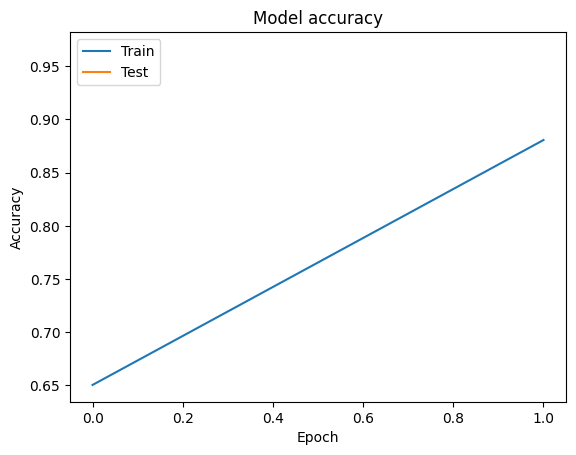

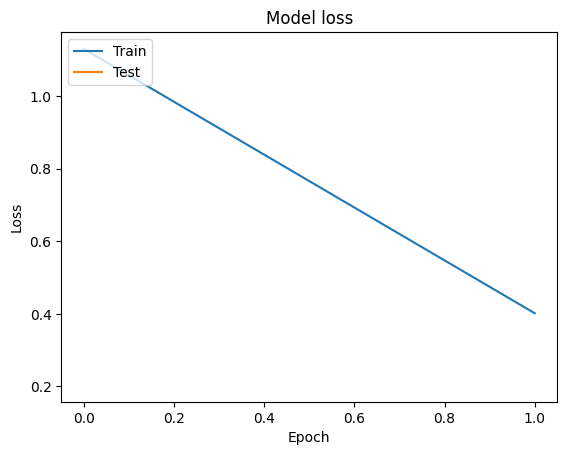

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG16 model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG16 model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Deep model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adadelta(),
metrics=['accuracy'])

print("Model parameters = %d" % model.count_params())
print(model.summary())

# Train the model with no data augmentation
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)

score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Train the model with no data augmentation
history = model.fit( train_generator_aug, steps_per_epoch=steps, epochs=epochs,
    validation_data=validation_generator, validation_steps=steps)

score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model parameters = 93938959
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_27 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 conv2d_28 (Conv2D)          (None, 218, 218, 64)      36928     
                                                                 
 conv2d_29 (Conv2D)          (None, 216, 216, 64)      36928     
                                                                 
 conv2d_30 (Conv2D)          (None, 214, 214, 64)      36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 107, 107, 64)     0         
 g2D)                                                            
                         

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Deep model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Deep model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()